In [1]:
library(tidyverse)
library(ggplot2)
library(ggthemes)
options(repr.plot.width = 8, repr.plot.height = 5)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.0     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Supplementary Figures
 -  1. The simulated data sets for scalability evaluation are generated with the script /Benchmarking/data_scalability/sim_genereation.R.
- 2. Scalability of CAbiNet is then evaluated on a computer with a single thread or 16 threads, by running /Benchmarking/data_scalability/cluster_submit.sh and /Benchmarking/data_scalability/cluster_submit_16t.sh 
- 3. The output 'csv' files are used for running time comparison.

### SFigure 9a, running time on a computer with single a thread

[1] 14 79

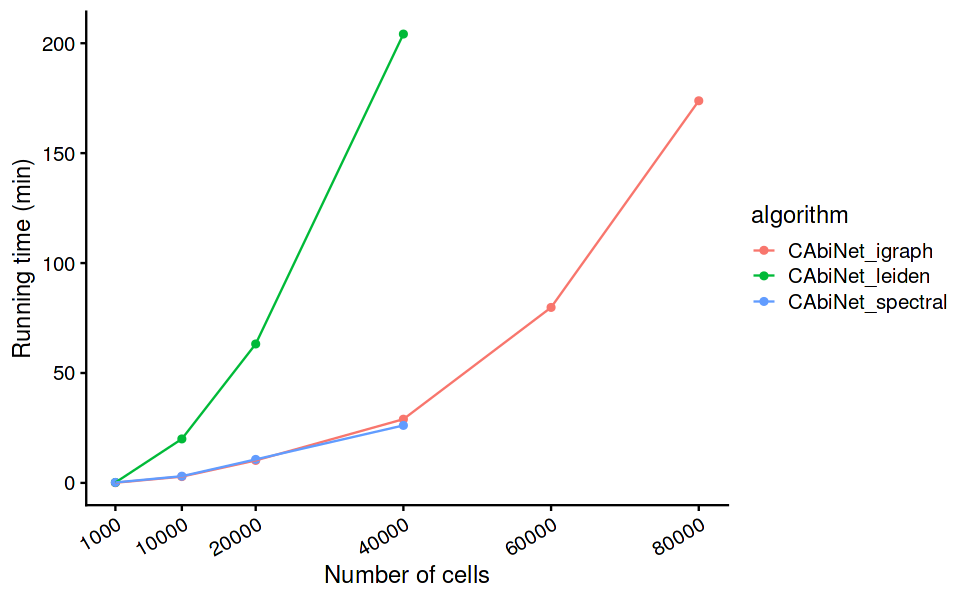

In [2]:

eval_files = list.files('../Benchmarking/data_scalability/results_1t/out', pattern = '*.csv', full.names = T)

options(repr.plot.width = 8, repr.plot.height = 5)

scal_df = data.frame()
for (f in eval_files){
    df = read.csv(f)
    scal_df = dplyr::bind_rows(scal_df, df)
}
dim(scal_df)

library(ggplot2)
scal_df$dataset = gsub('_ngene-2000', '', scal_df$dataset)
scal_df$dataset = gsub('ncell-', '', scal_df$dataset)
scal_df$algorithm = gsub('caclust_', 'CAbiNet_', scal_df$algorithm)

scal_df$dataset = as.numeric(scal_df$dataset)

ggplot(scal_df, aes(dataset,  (runtime + runtime_dimreduc)/60)) +
    geom_point(aes(group = algorithm, color = algorithm)) + 
    geom_line(aes(group = algorithm, color = algorithm) )+
    ggthemes::scale_fill_tableau(palette = "Tableau 10",
                                 type = "regular",
                                 direction = 1) +
    scale_x_continuous(breaks = c( 1000, 10000, 20000, 40000, 60000,80000, 100000), 
                       labels = c( '1000', 
                                   '10000',
                                   '20000',
                                   '40000',
                                    '60000',
                                   '80000',
                                   '1e+05')) +
    labs(x = 'Number of cells', y = 'Running time (min)') +
    cowplot::theme_cowplot() +
    theme(axis.text.x = element_text(angle = 30, vjust = 1, hjust=1))

ggsave('imgs/runningtime_singleprocessor_singleserver.pdf', width = 6, height = 4)

### SFigure 9b, running time on a computer with 16 threads

[1] 14 72

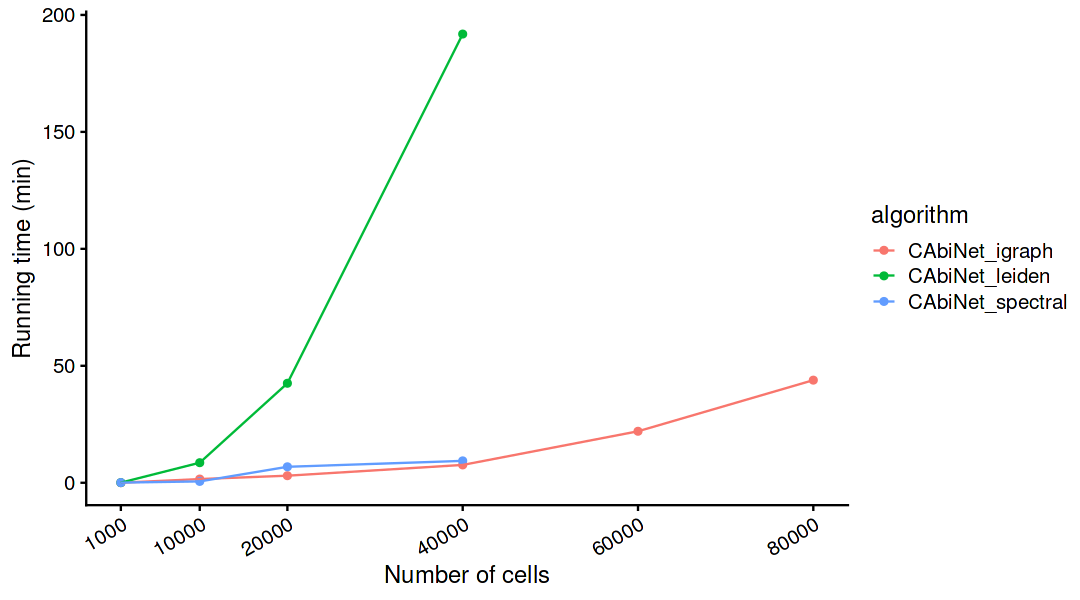

In [3]:
eval_files = list.files('../Benchmarking/data_scalability/results_16t/out', pattern = '*.csv', full.names = T)
options(repr.plot.width = 9, repr.plot.height = 5)

scal_df = data.frame()
for (f in eval_files){
    df = read.csv(f)
    scal_df = dplyr::bind_rows(scal_df, df)
}
dim(scal_df)

library(ggplot2)
scal_df$dataset = gsub('_ngene-2000', '', scal_df$dataset)
scal_df$dataset = gsub('ncell-', '', scal_df$dataset)
scal_df$algorithm = gsub('caclust_', 'CAbiNet_', scal_df$algorithm)
# scal_df$algorithm = paste0(scal_df$algorithm, '_MulticoreParam(workers = 16)')


scal_df$dataset = as.numeric(scal_df$dataset)


ggplot(scal_df, aes(dataset, runtime/60)) + geom_point(aes(group = algorithm, color = algorithm)) + 
geom_line(aes(group = algorithm, color = algorithm) )+
ggthemes::scale_fill_tableau(palette = "Tableau 10",
                              type = "regular",
                              direction = 1)+
    scale_x_continuous(breaks = c( 1000, 10000, 20000, 40000, 60000,80000, 100000), 
                       labels = c( '1000', 
                                   '10000',
                                   '20000',
                                   '40000',
                                    '60000',
                                   '80000',
                                   '1e+05')) +
labs(x = 'Number of cells', y = 'Running time (min)') +
cowplot::theme_cowplot() +
theme(axis.text.x = element_text(angle = 30, vjust = 1, hjust=1))
ggsave('imgs/runningtime_final_16threads_parallel.pdf', width = 6, height = 4)

### SFigure 10

Note: If you ran the `cluster_submit.sh` script for both the simulated data with 6 clusters and 20 clusters, you will have only a single collated results file which needs to be filtered accordingly.

[1] 100  30  60

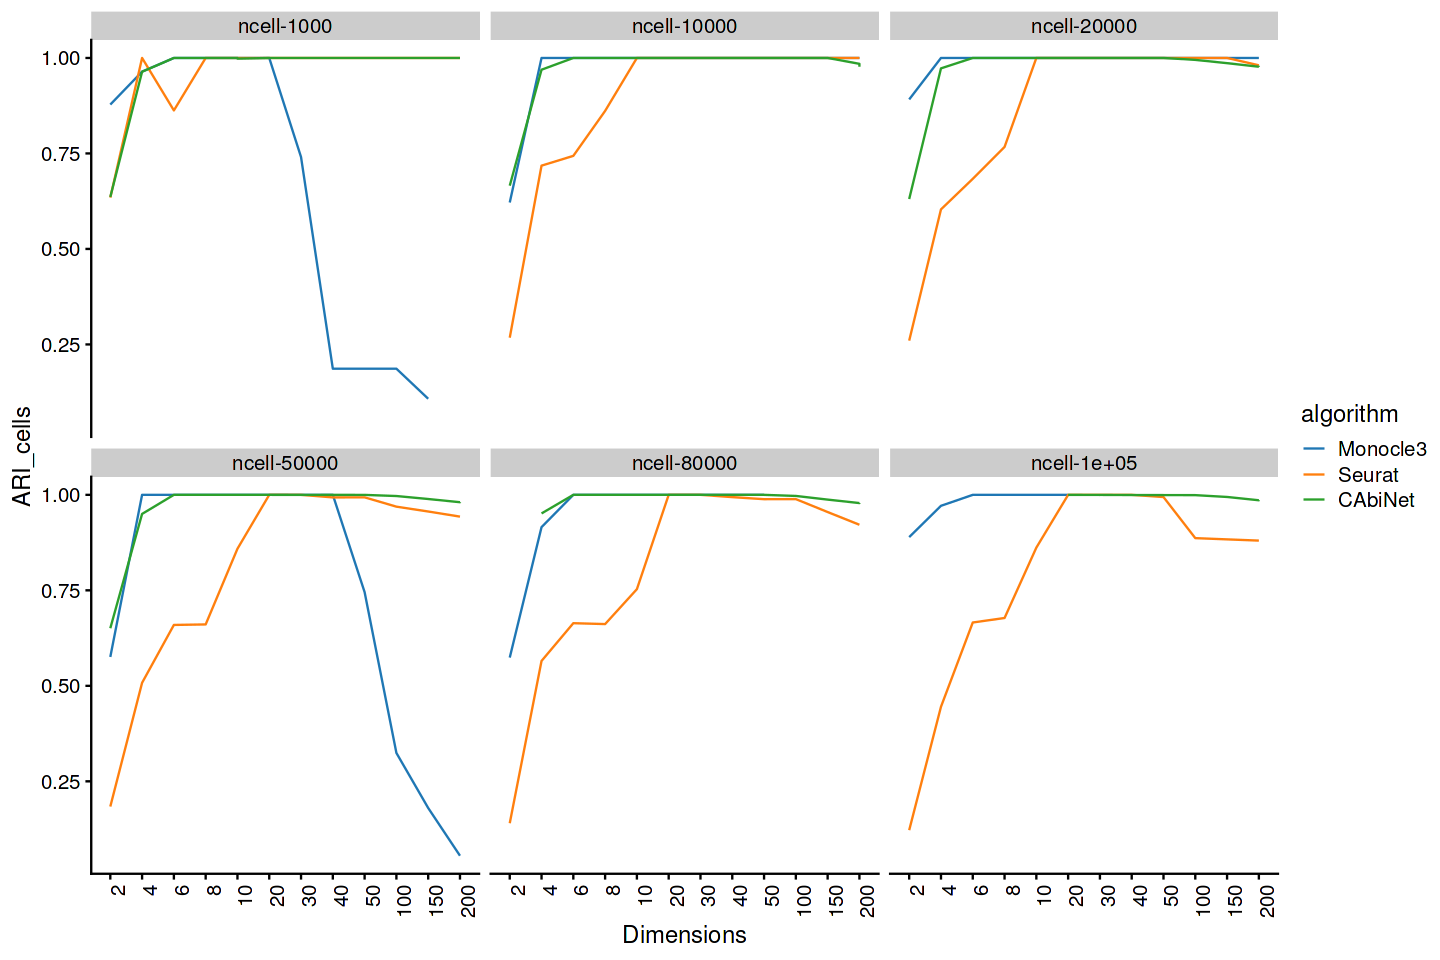

In [4]:
options(repr.plot.width = 12, repr.plot.height = 8)

res_dir = '../Benchmarking/robustness/results/collate_res'

library(dplyr)

df = readRDS(file.path(res_dir, "sim_2kgenes.rds"))
unique(df$NNs)
df$dims = factor(df$dims, levels = sort(unique(df$dims), decreasing = F))
df$dataset = gsub('_ngene-2000', '', df$dataset)
df = df[df$NNs == 30,]
df = df[df$ntop == 500,]
df = df[df$dataset != 'ncell-100',]
df %>% mutate(algorithm = gsub('caclust_igraph', 'CAbiNet', algorithm)) -> df
df$algorithm = factor(df$algorithm, levels = c('Monocle3', 'Seurat',  'CAbiNet'))

df$dataset = factor(df$dataset, 
                         levels = c('ncell-1000', 
                                   'ncell-10000',
                                   'ncell-20000',
                                   'ncell-50000',
                                   'ncell-80000',
                                   'ncell-1e+05'))
ggplot(df, aes(dims, ARI_cells)) + 
    geom_line(aes( group = algorithm,color = algorithm)) + 
    facet_wrap(~dataset, ncol= 3) +
    xlab('Dimensions') +
    ggthemes::scale_color_tableau(palette = "Classic 10",
                        type = "regular",
                        direction = 1) +
    cowplot::theme_cowplot() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
    # theme_bw()
ggsave('imgs/SFigure10a.pdf', width = 8,height = 4)

options(repr.plot.width = 8, repr.plot.height = 5)

In [5]:
res_dir = '../Benchmarking/robustness/results/collate_res'

df = readRDS(file.path(res_dir, "sim_20cls_collated.rds"))

df$sim_file <- tools::file_path_sans_ext(basename(df$file))

In [6]:
df$dims = factor(df$dims, levels = sort(unique(df$dims), decreasing = F))

df$dataset <- gsub("_ngene-2000_deprob-0.1_defacLoc-0.75_defacScale-0.75", "", df$dataset)
df$dataset <- gsub('pbmc3k_', '', df$dataset)
df <- df[df$dataset != 'ncell-1000', ] 

df <- df %>% mutate(algorithm = gsub('caclust_igraph', 'CAbiNet', algorithm))

df$algorithm <- factor(df$algorithm, levels = c('Monocle3', 'Seurat',  'CAbiNet'))
df$dataset <- factor(df$dataset, 
                         levels = c(
                             'ncell-1000',
                             'ncell-10000',
                             'ncell-20000',
                             'ncell-40000',
                             'ncell-60000',
                             'ncell-80000',
                             'ncell-1e+05'
                         ))

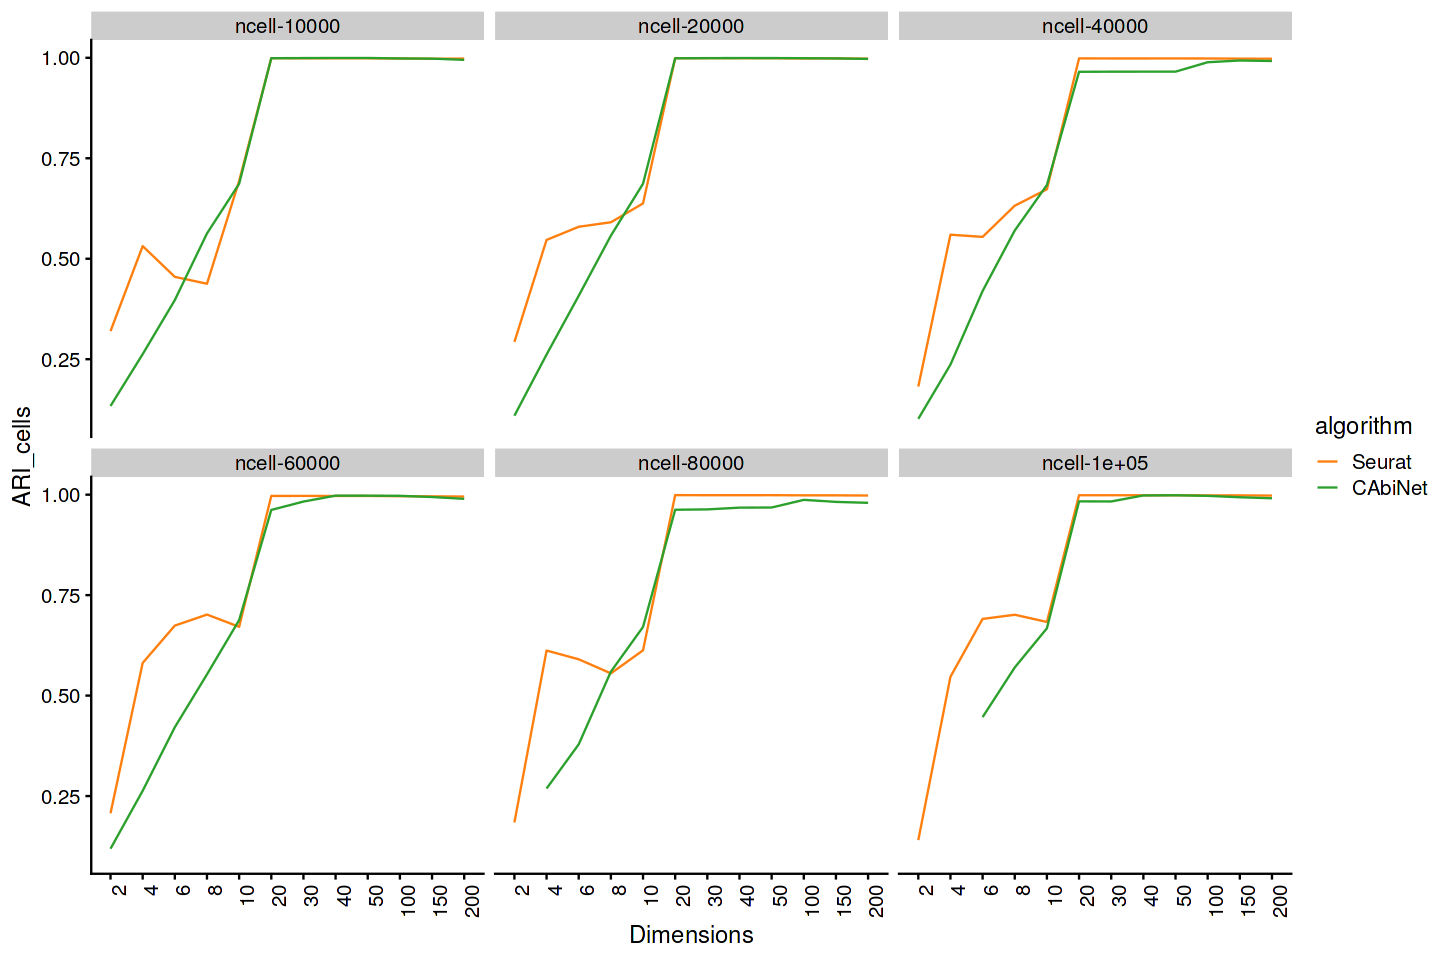

In [7]:
options(repr.plot.width = 12, repr.plot.height = 8)

df %>%
filter(algorithm != "Monocle3") %>% # Fails on almost all samples.
ggplot(aes(dims, ARI_cells)) + 
    geom_line(aes( group = algorithm,color = algorithm)) + 
    facet_wrap(~dataset, ncol= 3) +
    xlab('Dimensions') +
    scale_color_manual(values = c("Seurat" = "#ff7f0e", "CAbiNet" = "#2ca02c")) + 
    cowplot::theme_cowplot() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

ggsave('imgs/SFigure10b.pdf', width = 8,height = 4)
options(repr.plot.width = 8, repr.plot.height = 5)

### SFigure 11 heatmaps
 Step 1: pick up a simulated data on which most of the algorithms get the best biclustering performance, i.e. the highest clustering error values.

In [8]:
library(ggplot2)
library(tidyverse)
library(dplyr)

In [9]:
# Rename file to name of the benchmarking results.
# indir <- '/project/CAclust_scripts/CAclust_paper/benchmarking_splatter_sim/collated_results/231110_newARI/'
indir <- "../Benchmarking/results/simulated/collated_results"
zeisel_eval <- readRDS(file.path(indir, "zeisel_splatter_sim_results.rds"))
pbmc_eval <- readRDS(file.path(indir, "pbmc3k_splatter_sim_results.rds"))

In [10]:

# Not a single BC_Spectral run was successful and therefore removed.
zeisel_eval <- zeisel_eval %>% 
    filter(algorithm != "BC_Spectral")

pbmc_eval <- pbmc_eval %>% filter(algorithm != "BC_Spectral")

dfz <- zeisel_eval %>%
    mutate(Dataset = "zeisel") %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(simulation = paste(dePROB, defacLOC, defacSCALE, sep="_")) %>%
    mutate(simulation = factor(simulation, levels = c('0.02_0.75_0.75', 
                                                      '0.06_0.75_0.75',
                                                      '0.1_0.75_0.75',
                                                      '0.02_1.5_1.5',
                                                      '0.06_1.5_1.5',
                                                      '0.1_1.5_1.5')))

dfp <- pbmc_eval %>%
    mutate(Dataset = "pbmc3k") %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(simulation = paste(dePROB, defacLOC, defacSCALE, sep="_")) %>%
    mutate(simulation = factor(simulation, levels = c('0.02_0.75_0.75', 
                                                      '0.06_0.75_0.75',
                                                      '0.1_0.75_0.75',
                                                      '0.02_1.5_1.5',
                                                      '0.06_1.5_1.5',
                                                      '0.1_1.5_1.5')))

df_all <- rbind(dfz,dfp)
df_all$algorithm <- gsub("sv4d", "s4vd", df_all$algorithm)
df_all$algorithm <- factor(df_all$algorithm, levels = c('CAbiNet_igraph',
                                                        'CAbiNet_leiden',
                                                'CAbiNet_spectral',
                                                'Seurat',
                                                'Monocle3',
                                                'Bimax',
                                                'CCA',
                                                'QUBIC',
                                                'IRISFGM',
                                                's4vd',
                                                'Plaid',
                                                'Unibic',
                                                'Xmotifs',
                                                'divbiclust',
                                                'BackSPIN'
                                                ))


In [11]:
df_all %>% mutate(sim_dataset = paste0(Dataset, '_', simulation)) %>%
            group_by(Dataset, algorithm) %>% 
            filter(!is.na(clustering_error)) %>%
           filter(clustering_error == max(clustering_error)) %>%
           group_by(sim_dataset) %>%
           summarise(n.max.alg = length(unique(algorithm)),
                     Unique_Values = toString(unique(algorithm))) -> stat.df

stat.df

sim_dataset,n.max.alg,Unique_Values
<chr>,<int>,<chr>
pbmc3k_0.02_1.5_1.5,4,"Bimax, Monocle3, Plaid, Seurat"
pbmc3k_0.06_1.5_1.5,3,"QUBIC, CAbiNet_igraph, CAbiNet_leiden"
pbmc3k_0.1_0.75_0.75,1,Xmotifs
pbmc3k_0.1_1.5_1.5,6,"BackSPIN, CCA, IRISFGM, Unibic, CAbiNet_spectral, s4vd"
zeisel_0.02_0.75_0.75,2,"Monocle3, Xmotifs"
zeisel_0.02_1.5_1.5,3,"Plaid, QUBIC, Seurat"
zeisel_0.06_1.5_1.5,2,"CAbiNet_igraph, CAbiNet_leiden"
zeisel_0.1_1.5_1.5,7,"BackSPIN, Bimax, CCA, IRISFGM, Unibic, CAbiNet_spectral, s4vd"


In [12]:
df_all %>%  mutate(sim_dataset = paste0(Dataset, '_', simulation)) %>%
            filter(sim_dataset == 'zeisel_0.1_1.5_1.5') %>%
            group_by(sim_dataset, algorithm) %>% 
            filter(!is.na(clustering_error)) %>% #-> zeisel.best
            # unique(zeisel.best$algorithm)
            filter(clustering_error == max(clustering_error)) %>%
            group_by(sim_dataset) %>%
            filter(!duplicated(algorithm))-> zeisel.best
# zeisel.best
# dim(zeisel.best)

df_all %>%  mutate(sim_dataset = paste0(Dataset, '_', simulation)) %>%
            filter(sim_dataset == 'zeisel_0.1_1.5_1.5',
                  algorithm == 'divbiclust') %>%
            filter(!is.na(ARI_cells)) %>% #-> zeisel.best
            # unique(zeisel.best$algorithm)
            filter(ARI_cells == max(ARI_cells)) %>%
            filter(!duplicated(algorithm)) -> divbiclust.df
dim(divbiclust.df)

opts = rbind(zeisel.best, divbiclust.df)
# write.csv(best.params, 'best_params_forHeatmap.csv')
opts

[1]  1 84

algorithm,ARI_cells,ARI_genes,relevance,recovery,clustering_error,RNIA,fuzzyARI_cells,ARI_cells_old,ngenes,⋯,numLevels,stop_const,low_thrs,help,dePROB,defacLOC,defacSCALE,Dataset,simulation,sim_dataset
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>
BackSPIN,1.000000000,4.458836e-01,0.607941520,0.607941520,0.511502038,0.511502038,1.00000000,1.0000000000,2000,⋯,3,1.15,0.1,FALSE,0.1,1.5,1.5,zeisel,0.1_1.5_1.5,zeisel_0.1_1.5_1.5
Bimax,-0.003008138,8.682453e-05,0.022891318,0.003815220,0.006115997,0.006952815,0.00000000,0.0006004114,2000,⋯,2,1.15,0.2,FALSE,0.1,1.5,1.5,zeisel,0.1_1.5_1.5,zeisel_0.1_1.5_1.5
CCA,0.000000000,0.000000e+00,0.044754793,0.023619660,0.044754793,0.141717962,0.00000000,0.0000000000,2000,⋯,2,1.15,0.2,FALSE,0.1,1.5,1.5,zeisel,0.1_1.5_1.5,zeisel_0.1_1.5_1.5
IRISFGM,0.001787304,2.073666e-02,0.037323657,0.020772454,0.035289104,0.117747492,0.00000000,0.0017873042,2000,⋯,2,1.15,0.2,FALSE,0.1,1.5,1.5,zeisel,0.1_1.5_1.5,zeisel_0.1_1.5_1.5
Monocle3,1.000000000,2.240226e-02,0.188496560,0.188496560,0.176406714,0.176406714,1.00000000,1.0000000000,2000,⋯,2,1.15,0.2,FALSE,0.1,1.5,1.5,zeisel,0.1_1.5_1.5,zeisel_0.1_1.5_1.5
Plaid,0.469361123,1.311170e-01,0.181661718,0.302742444,0.183818792,0.183832168,0.38517749,0.7174953305,2000,⋯,2,1.15,0.2,FALSE,0.1,1.5,1.5,zeisel,0.1_1.5_1.5,zeisel_0.1_1.5_1.5
QUBIC,0.091250226,3.531324e-03,0.181083438,0.031007708,0.046076572,0.056266932,0.00000000,0.2120855016,2000,⋯,2,1.15,0.2,FALSE,0.1,1.5,1.5,zeisel,0.1_1.5_1.5,zeisel_0.1_1.5_1.5
Seurat,1.000000000,5.851482e-01,0.762518096,0.762518096,0.755298037,0.755298037,1.00000000,1.0000000000,2000,⋯,2,1.15,0.2,FALSE,0.1,1.5,1.5,zeisel,0.1_1.5_1.5,zeisel_0.1_1.5_1.5
Unibic,0.014632777,4.989171e-02,0.033650190,0.033154700,0.014124380,0.021252639,0.00000000,0.0070478526,2000,⋯,2,1.15,0.2,FALSE,0.1,1.5,1.5,zeisel,0.1_1.5_1.5,zeisel_0.1_1.5_1.5


 Step 2: Run each algorithm with the corresponding parameters and draw heatmaps of biclusters

In [ ]:
library(Rcpp)
library(CAbiNet)
library(APL)
library(tidyverse)
library(SingleCellExperiment)
library(SummarizedExperiment)
library(splatter)
library(MatrixGenerics)
library(matrixStats)
library(Matrix)
library(optparse)
library(reticulate)
library(scran)
library(scater)
library(IRISFGM)
library(Seurat)
library(mclust)
library(isa2)
library(s4vd)
library(QUBIC)
library(runibic)
library(skmeans)
library(scPNMF)
library(bluster)
library(dplyr)
source('helpers.R')
source("../Benchmarking/algorithms/backspin/backspin_fun.R")

library(monocle3)
# library(monocle3, lib.loc = '/pkg/R-4.1.0-0/lib/R/library')

set.seed(2358)

source("../Benchmarking/sim_eval.R")
old_wd <- getwd()
setwd("../Benchmarking/")
source("./algorithms/biclustlib/clustering_error.R")
# Set working dir to old dir
setwd(old_wd)

dir.create('imgs/hms')
setwd('imgs/hms')

print('starting')

for (i in 1:nrow(opts)){

    opt = opts[i,]
    dataset=opt$dataset

    
    # Misc
    filepath = opt$file
    # print(filepath)
    ntop = opt$ntop
    distance = opt$distance
    outdir = opt$outdir
    name = opt$name
    nclust = opt$nclust
    sim = opt$sim
    vst = opt$vst
    truth = opt$truth
    algorithm = opt$algorithm
    
    DECOMP <- opt$decomp

#pca_preproc <- opt$pcapreproc

    # if(nclust == "NULL"){
    #     nclust <- NULL
    # }

    # CAclust
    
    dims = opt$dims
    NNs = opt$NNs
    prune = opt$prune
    prune_overlap = opt$prune_overlap
    resol = as.numeric(opt$resolution)
    usegap = opt$usegap
    SNN_mode = opt$SNN_mode
    graph_select <- opt$graph_select
    graph_select_by_prop <- opt$graph_select_by_prop
    gcKNN <- opt$gcKNN
    overlap <- opt$overlap
    leiden_pack = opt$leiden_pack
    
    if (is.character(overlap)) overlap <- NA
    
    # QUBIC
    c_param <- opt$c_param
    r_param <- opt$r_param
    q_param <- opt$q_param
    
    #s4vd
    
    pcerv <- opt$pcerv
    pceru <- opt$pceru
    ss_thr <- c(opt$ss_thr_min, (opt$ss_thr_min+opt$ss_thr_add))
    
    # Plaid parameters
    rrelease <- opt$rrelease
    crelease <- opt$crelease
    
    # Unibic
    t_param <- opt$t_param
    q_discr <- opt$q_discr
    
    # Bimax
    minr <- opt$minr
    minc <- opt$minc
    # maxc <- opt$maxc
    
    # CCA
    alpha <- opt$alpha
    delta <- opt$delta
    
    # Xmotifs
    ns_param <- opt$ns_param
    nd_param <- opt$nd_param
    sd_param <- opt$sd_param
    alphaX <- opt$alphaX
    
    # BC_Spectral
    numEig <- opt$numEig
    minr_BCS <- opt$minr_BCS
    minc_BCS <- opt$minc_BCS
    withinVar <- opt$withinVar
    nbest <- opt$nbest
    nclusters <- opt$nclusters
    
    if (!is.numeric(nclusters)){
        nclusters <- NULL
    }
    
    # IRISFGM/QUBIC2
    
    Qconsistency <- opt$Qconsistency
    Qoverlap <- opt$Qoverlap
    Qcmin <- opt$Qcmin
    
    # Seurat
    logfc_thr <- opt$logfc_thr
    min_perc <- opt$min_perc
    rthr <- opt$rthr
    
    # Monocle
    ntop = opt$ntop
    resolution = as.numeric(opt$resolution)
    reduction_method = opt$redm
    genes_to_test_per_group = opt$ngene_pg
    
    # DivBiclust
    max_diff = opt$maxdiff
    do_rate = opt$dorate
    seed_col_sz = opt$seedColSz
    max_col_sz = opt$maxColSz
    simThresh = opt$simThresh
    is_divbiclust = opt$isdivbiclust
    
    
    # BackSpin
    numL <- opt$numLevels
    stopc <- opt$stop_const
    lowT <- opt$low_thrs
    
    
    if (isTRUE(sim)){
        sim_params <- stringr::str_match(string = opt$file,
        # pattern = ".*dePROB-(?<dePROB>[0-9]_[0-9]*)_defacLOC-(?<defacLOC>[0-9]_?[0-9]*)_defacSCALE-(?<defacSCALE>[0-9]_?[0-9]*).rds")
        pattern = ".*dePROB-(?<dePROB>[0-9]_[0-9]*)_defacLOC-(?<defacLOC>[0-9]_?[0-9]*)_defacSCALE-(?<defacSCALE>[0-9]_?[0-9]*)[:graph:]{0,9}.rds")
    
        opt$dePROB <- as.numeric(gsub("_", ".", sim_params[,"dePROB"]))
        opt$defacLOC <- as.numeric(gsub("_", ".", sim_params[,"defacLOC"]))
        opt$defacSCALE <- as.numeric(gsub("_", ".", sim_params[,"defacSCALE"]))
    }
    
    
    
    if (isTRUE(algorithm == 'divbiclust')){
        # prefix of input file name
        # ds_type = file.path(outdir,paste0(name, '_Ntop_', ntop))
        ds_type = name
       	in_file = file.path(outdir,paste0(dataset, '_Ntop_', ntop)) 
        # calculate the dropout rates in the input data set (the data that has been preprocessed)
        filepath = file.path(outdir, paste0(dataset, '_Ntop_', ntop, '_matrix.txt' ))
        # print(filepath)
        mat = read.csv(filepath,  header = F,  skip = 1)
        mat = mat[, 2:ncol(mat)]
        # mat[is.na(mat)] = 0
        # do_rate = sum(mat == 0)/dim(mat)[1]/dim(mat)[2]
        ncell = ncol(mat)
                        
    }
    
    fileformat = tools::file_ext(filepath)
    
    if (fileformat == 'txt'){
    
        # stop("Provided txt file as input. RDS required.")
        cat('running divbiclust.....')
    
        # cnts = read.table(opt$file, row.names = 1, header=T, sep = '\t')
        # cnts = as.matrix(cnts)
        # data = cnts
    
    }else if (fileformat %in% c('rds', 'RDS') ){
    
    
        data = readRDS(filepath)
    
        if (is(data, "Seurat")){
            stop("Please provide SingleCellExperiment data, not Seurat.")
        }
    
        if (!is.na(ntop)){
    
            genevars <- modelGeneVar(data, assay.type = "logcounts")
    
            if (isTRUE(graph_select_by_prop) & isTRUE(graph_select)){
    
                chosen <- getTopHVGs(genevars, prop = 0.8, var.threshold = NULL)
    
            } else {
    
                chosen <- getTopHVGs(genevars, n = ntop, var.threshold = NULL)
    
            }
    
            data_old <- data
            data <- data[chosen,]
        }
    
    
    	cnts <- as.matrix(logcounts(data))
    
    
        trueclusters = colData(data)[,colnames(colData(data)) == truth]
    
        if (is.null(nclust)){
            nclust = length(unique(colData(data)[,colnames(colData(data)) == truth]))
        }
    
    }


    if (algorithm == 'Unibic'){

        cat("\nStarting Unibic\n")

        t = Sys.time()
        
        res_ca <- biclust::biclust(cnts,
                                method=BCUnibic(),
                                t = t_param,
                                q = q_discr)
        
        t.run <- difftime(Sys.time(), t, units = 'secs')
        res <- name_biclust(biclust = res_ca, input = cnts)

    }else if (algorithm == 'CCA'){

        t <- Sys.time()

        res <- biclust::biclust(cnts,
                                method = BCCC(),
                                delta = delta,
                                alpha=alpha,
                                number=nclust)
        
        t.run <- difftime(Sys.time(), t, units = 'secs')
        
        if (res@Number == 1 & ncol(res@RowxNumber) == ncol(res@NumberxCol)){
            res@NumberxCol <- t(res@NumberxCol)
        }
        
        res <- name_biclust(biclust = res, input = cnts)
    } else if (algorithm == 'Plaid'){

        ## PLAID
        cat("\nStarting PLAID\n")
        
        t = Sys.time()
        
        res <- biclust::biclust(cnts,
                                method = BCPlaid(),
                                cluster = "b",
                                verbose = FALSE,
                                row.release = rrelease,
                                col.release = crelease)
        
        t.run = difftime(Sys.time(), t, units = 'secs')
        
        res <- name_biclust(biclust = res, input = cnts)
    }else if (algorithm == 'Xmotifs'){

        # XMOTIF
        cat("\nStarting Xmotifs\n")
        
        t <- Sys.time()
        res <- biclust::biclust(cnts,
                                method = BCXmotifs(),
                                ns = ns_param,
                                nd = nd_param,
                                sd = sd_param,
                                alpha = alphaX,
                                number = nclust)
        
        t.run <- difftime(Sys.time(), t, units = 'secs')
        
        res <- name_biclust(biclust = res, input = cnts)

    }else if (algorithm == 'Bimax'){

        cat("\nStarting Bimax\n")

        t <- Sys.time()
        res <-  biclust::biclust(cnts,
                                method = BCBimax(),
                                minr = minr,
                                minc = minc,
                                # maxc = maxc,
                                number=nclust)
        
        t.run <- difftime(Sys.time(), t, units = 'secs')
        
        res <- name_biclust(biclust = res, input = cnts)

    }else if (algorithm == 's4vd'){

        cat("\nStarting sv4d\n")

        t <- Sys.time()
        
        res <- biclust::biclust(cnts,
                                method=BCs4vd(),
                                pcerv=pcerv,
                                pceru=pceru,
                                ss.thr=ss_thr,
                                start.iter=3,
                                size=0.632,
                                cols.nc=TRUE,
                                steps=100,
                                pointwise=TRUE,
                                merr=0.0001,
                                iter=100,
                                nbiclust=nclust,
                                col.overlap=FALSE)
        
        t.run <- difftime(Sys.time(), t, units = 'secs')
        res <- name_biclust(biclust = res, input = cnts)

    }else if (algorithm == 'QUBIC'){

        # QUBIC
        cat("\nStarting QUBIC.\n")
        
        t = Sys.time()
        
        res <- biclust::biclust(cnts,
                                method = BCQU(),
                                o = nclust,
                                c = c_param,
                                q = q_param,
                                r = r_param)
        
        t.run = difftime(Sys.time(), t, units = 'secs')
        
        res <- name_biclust(biclust = res, input = cnts)

    }else if (algorithm == 'IRISFGM'){

        quiet <- function(x) {
          sink(tempfile())
          on.exit(sink())
          invisible(force(x))
        }
        
        tmp_dir = './'
        
        old_wd <- getwd()
        setwd(tmp_dir)
        
        iris_obj <- CreateIRISFGMObject(as.matrix(counts(data)))
        iris_obj@Processed_count <- cnts
        # iris_obj_p <- ProcessData(iris_obj, normalization = "cpm", IsImputation = FALSE)
               
        # QUBIC
        cat("\nStarting IRIS-FGM.\n")
        
        t = Sys.time()
        
        iris_obj <- RunLTMG(iris_obj, Gene_use = "all", k = 5)
        iris_obj <- CalBinaryMultiSignal(iris_obj)

        iris_obj <- RunBicluster(iris_obj,
                            DiscretizationModel = "LTMG",
                            OpenDual = FALSE,
                            NumBlockOutput = nclust,
                            BlockOverlap = Qoverlap,
                            Extension = Qconsistency,
                            BlockCellMin = Qcmin)
        
        t.run = difftime(Sys.time(), t, units = 'secs')
        
        setwd(old_wd)
        
        res <- qubic2biclust(irisfgm_obj=iris_obj,
                             sce = data,
                             params = list())

    } else if (algorithm == 'BackSPIN'){

        ##################################
        cat("\nStarting backSPIN.\n")
        ##################################
        
        
        t = Sys.time()
        
        old_wd <- getwd()
        setwd("../../../Benchmarking/")
        
        #' @param data: 2-D array
        #' the data matrix, rows should be genes and columns single cells/samples
        #' @param numLevels: int
        #' the number of splits that will be tried
        #' @param first_run_iters: float
        #' the iterations of the preparatory SPIN
        #' @param first_run_step: float
        #' the step parameter passed to _generate_widlist for the preparatory SPIN
        #' @param runs_iters: int
        #' the iterations parameter passed to the _divide_to_2and_resort.
        #' influences all the SPIN iterations except the first
        #' @param runs_step: float
        #' the step parameter passed to the _divide_to_2and_resort.
        #' influences all the SPIN iterations except the first
        #' @param wid: float
        #' the wid of every iteration of the splitting and resorting
        #' @param split_limit_g: int
        #' If the number of specific genes in a subgroup is smaller than this number
        #' splitting of that subgrup is not allowed
        #' @param split_limit_c: int
        #' If the number cells in a subgroup is smaller than this number splitting of
        #' that subgrup is not allowed
        #' @param stop_const: float
        #' minimum score that a breaking point has to reach to be suitable for splitting
        #' @param low_thrs: float
        #' genes with average lower than this threshold are assigned to either of the
        #' splitting group reling on genes that are higly correlated with them
        bs <- backspin(data = cnts,
                       numLevels = numL, #2
                       first_run_iters = 10.0,
                       first_run_step = 0.05,
                       runs_iters = 8,
                       runs_step = 0.25,
                       split_limit_g = 2,
                       split_limit_c = 2,
                       stop_const = stopc, #1.15
                       low_thrs = lowT, # 0.2
                       verbose = FALSE)
        
        # Set working dir to old dir
        setwd(old_wd)
        
        t.run = difftime(Sys.time(), t, units = 'secs')
        
        #########
        
        names(bs) <- c("genes_order", "cells_order", "genes_gr_level", "cells_gr_level", "cells_gr_level_sc", "genes_bor_level", "cells_bor_level") # nolint
        
        
        # cell binary matrix
        lvl <- numL + 1
        cell_clusters <- bs$cells_gr_level[,lvl]
        ccs <- unique(cell_clusters)
        
        cell_mat <- matrix(FALSE, nrow = length(ccs), ncol = length(cell_clusters))
        rownames(cell_mat) <- paste0("BC", ccs + 1)
        colnames(cell_mat) <- colnames(cnts)
        
        for (i in seq_along(ccs)){
            idx <- bs$cells_order[which(cell_clusters == ccs[i])]  + 1
            cell_mat[i, idx] <- TRUE
        }
        
        # gene binary matrix
        
        gene_clusters <- bs$genes_gr_level[,lvl]
        gcs <- sort(unique(gene_clusters))
        
        gene_mat <- matrix(FALSE, nrow = length(gene_clusters), ncol = length(gcs))
        rownames(gene_mat) <- rownames(cnts)
        colnames(gene_mat) <- paste0("BC", ccs + 1)
        
        
        for (i in seq_along(gcs)){
            idx <- bs$genes_order[which(gene_clusters == gcs[i])] + 1
            gene_mat[idx, i] <- TRUE
        }
        
        
        nclusts <- min(length(ccs), length(gcs))
        
        # make biclust object
        
        res <- new("Biclust","Parameters" = opt,
                               "RowxNumber" = gene_mat,
                               "NumberxCol" = cell_mat,
                               "Number" = nclusts,
                               "info" = list(paste0("BackSpin biclustering at level ", lvl )))
        
        
        res <- CAbiNet::rm_monoclusters(res)

    }else if (algorithm == 'divbiclust'){

        sourceCpp('../Benchmarking/algorithms/src/divbiclust.cpp')
        cat("\nStarting divbiclust...\n")
        t = Sys.time()
        
        
        res = DivBiclust(ds_type = ds_type, 
        				 in_file = in_file,
                  		 max_diff = max_diff, 
                  		 do_rate = do_rate, 
                  		 seed_col_sz = seed_col_sz, 
                  		 max_col_sz = max_col_sz, 
                  		 simthresh = simThresh)
        
        
        t.run = Sys.time() - t
        
        ari = stringr::word(res, 1, 1, '_')
        ari = as.numeric(ari)
        ncluster = stringr::word(res, 2, 2, '_')
        ncluster = as.numeric(ncluster)
        
        eval_res <- c(list("algorithm" = algorithm),
                      'ARI_cells' = ari,
                      # 'ARI_genes' = NA,
                      # 'relevance' = NA,
                      # 'recovery' = NA,
                      # 'clustering_error' = NA,
                      # 'RNIA' = NA,
                      list("ngenes" = ntop,
                           "ncells" = ncell,
                           "nclust_found" = ncluster,
                           "runtime" = t.run,
                           "runtime_dimreduc" = NA))
        
        eval_res <- bind_cols(eval_res, as_tibble(opt))
    
    }else if (algorithm == 'Monocle3'){

        cds = new_cell_data_set(counts(data),
                         cell_metadata = colData(data))

        # monocle
        cat("\nStarting Monocle3 clustering\n")
        
        t <- Sys.time()
        
        
        cds <- preprocess_cds(cds,
                              num_dim = dims,
                              norm_method = "log",
                              use_genes = rownames(data))
        
        cds <- reduce_dimension(cds,
                               reduction_method = reduction_method
                               )
        
        cds <- cluster_cells(cds,
                             reduction_method = reduction_method,
                             cluster_method = 'leiden',
                             k = NNs,
                             resolution = resolution,
                             random_seed = 1)
        
        # res <- partitions(cds, reduction_method = reduction_method)
        part <- partitions(cds, reduction_method = reduction_method)
        
        
        # gcb <- "partition"
        
        if (length(unique(part)) == 1){
        
            res <- biclust::BiclustResult(mypara = list(),
                                      a = matrix(),
                                      b = matrix(),
                                      c = 0,
                                      d = list())
        
            t.run <- difftime(Sys.time(), t, units = 'secs')
        
        } else {
        
            marker_test_res <- top_markers(cds,
                                           group_cells_by = "partition",
                                           reduction_method = reduction_method,
                                           reference_cells = NULL,
                                           cores = 1,
                                           genes_to_test_per_group = genes_to_test_per_group,
                                           speedglm.maxiter = 200)
        
            top_specific_markers <- marker_test_res %>%
                                        filter(fraction_expressing >= 0.10) %>%
                                        filter(marker_test_q_value < 0.05) %>%
                                        filter(marker_score > 0.1) %>%
                                        group_by( gene_id) %>%
                                        top_n(1, pseudo_R2)
        
        
        
            t.run <- difftime(Sys.time(), t, units = 'secs')
        
            #########
        
            ccs <- sort(unique(part))
            nclusts <- length(ccs)
        
            monocle_cells <- matrix(FALSE, nrow = length(ccs), ncol = ncol(cds))
            rownames(monocle_cells) <- paste0("BC", ccs)
            colnames(monocle_cells) <- Cells(cds)
        
        
            for (i in seq_along(ccs)){
                clust_cells <- Cells(cds)[which(part == ccs[i])]
                idx <- which(colnames(monocle_cells) %in% clust_cells)
                monocle_cells[i, idx] <- TRUE
            }
        
            gcs <- sort(unique(top_specific_markers$cell_group))
        
        
            monocle_genes <- matrix(FALSE, nrow = nrow(cds), ncol = length(ccs))
            rownames(monocle_genes) <- rownames(cds)
            colnames(monocle_genes) <- paste0("BC", ccs)
        
            for (i in seq_along(ccs)){
        
                if(!ccs[i] %in% gcs) next
        
                clust_genes <- top_specific_markers$gene_id[which(top_specific_markers$cell_group == ccs[i])]
                idx <- which(rownames(monocle_genes) %in% clust_genes)
                monocle_genes[idx, i] <- TRUE
        
            }
        
            res <- new("Biclust","Parameters" = opt,
                               "RowxNumber" = monocle_genes,
                               "NumberxCol" = monocle_cells,
                               "Number" = nclusts,
                               "info" = list("monocle clustering and DEA."))
        }

    }else if (algorithm == 'Seurat'){

        rownames(data_old) = gsub('_', '-', rownames(data_old))

        # if (is(counts(data_old), 'dgTMatrix')){
        #   counts(data_old) = Matrix(counts(data_old), sparse = T)
        # }
        # if (is(logcounts(data_old), 'dgTMatrix')){
        #   logcounts(data_old) = Matrix(logcounts(data_old), sparse = T)
        # }
        
        
        # seu <- as.Seurat(data_old)
        
        seu <- CreateSeuratObject(counts = as(counts(data_old), "dgCMatrix"),
                                  meta.data = as.data.frame(colData(data_old)))
        
        
        seu <- SetAssayData(object = seu,
                            slot = "data",
                            new.data = as(logcounts(data_old), "dgCMatrix"))
                            
        seu <- FindVariableFeatures(object = seu,
                                    nfeatures = ntop)
        # seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 4000)
        
        all.genes <- rownames(seu)
        
        
        # Seurat
        cat("\nStarting Seurat clustering\n")
        
        t <- Sys.time()
        
        
        seu <- ScaleData(object = seu, features = VariableFeatures(seu))
        
        seu <- RunPCA(object = seu,
                      npcs = dims,
                      features = VariableFeatures(seu))
        
        seu <- FindNeighbors(object = seu,
                             dims = seq_len(dims),
                             k.param = NNs,
                             prune.SNN = prune)
        
        seu <- FindClusters(object = seu,
                            resolution = resol)
        
        seu.markers <- FindAllMarkers(seu,
                                      features = VariableFeatures(seu),
                                      only.pos = TRUE,
                                      min.pct = min_perc, # 0.25
                                      logfc.threshold = logfc_thr, # 0.25
                                      return.thresh = rthr) # 0.01
        
        
        t.run <- difftime(Sys.time(), t, units = 'secs')
        
        #########
        
        ccs <- sort(unique(seu$seurat_clusters))
        nclusts <- length(ccs)
        
        seurat_cells <- matrix(FALSE, nrow = length(ccs), ncol = ncol(seu))
        rownames(seurat_cells) <- paste0("BC", as.numeric(ccs) )
        colnames(seurat_cells) <- Cells(seu)
        
        
        for (i in seq_along(ccs)){
            clust_cells <- Cells(seu)[which(seu$seurat_clusters == ccs[i])]
            idx <- which(colnames(seurat_cells) %in% clust_cells)
            seurat_cells[i, idx] <- TRUE
        }
        
        gcs <- sort(unique(seu.markers$cluster))
        
        seurat_genes <- matrix(FALSE, nrow = length(VariableFeatures(seu)), ncol = length(ccs))
        rownames(seurat_genes) <- VariableFeatures(seu)
        colnames(seurat_genes) <- paste0("BC", as.numeric(ccs) )
        
        # seurat_genes <- matrix(FALSE, nrow = nrow(seu), ncol = length(ccs))
        # rownames(seurat_genes) <- rownames(seu)
        
        for (i in seq_along(ccs)){
        
            if(!ccs[i] %in% gcs) next
        
            clust_genes <- seu.markers$gene[which(seu.markers$cluster == ccs[i])]
            idx <- which(rownames(seurat_genes) %in% clust_genes)
            seurat_genes[idx, i] <- TRUE
        
        }
        
        
        
        res <- new("Biclust","Parameters" = list(),
                               "RowxNumber" = seurat_genes,
                               "NumberxCol" = seurat_cells,
                               "Number" = nclusts,
                               "info" = list("Seurat clustering and DEA."))
        
        data_old <- data_old[VariableFeatures(seu),]
        data = data_old

        if (isTRUE(sim)){
    
            eval_res <-  evaluate_sim(sce = data_old,
                                      biclust = res,
                                      truth_col = truth)
        
            eval_res <- c(list("algorithm" = algorithm),
                          as.list(eval_res),
                          list("ngenes" = length(VariableFeatures(seu)),
                               "ncells" = ncol(seu),
                               "nclust_found" = res@Number,
                               "runtime" = t.run,
                               "runtime_dimreduc" = NA))
        
            eval_res <- bind_cols(eval_res, as_tibble(opt))
        
        
        } else{
        
            eval_res <-  evaluate_real(sce = data_old,
                                    biclust = res,
                                    truth_col = truth)
        
            eval_res <- c(list("algorithm" = algorithm),
                          as.list(eval_res),
                          list("ngenes" = length(VariableFeatures(seu)),
                               "ncells" = ncol(seu),
                               "nclust_found" = res@Number,
                               "runtime" = t.run,
                               "runtime_dimreduc" = NA))
        
            eval_res <- bind_cols(eval_res, as_tibble(opt))
        
        
        }
    
    }else if (algorithm == 'CAbiNet_igraph'){

        if (is.na(dims)){
            stop("Need to specify dimensionality.")
        }
        
        cat("\nStarting CA.\n")
        t = Sys.time()
        caobj = cacomp(cnts,
                       dims = dims,
                       top = nrow(cnts),
                       python = TRUE)
        
        t.CA = difftime(Sys.time(), t, units = 'secs')
        
        
        # Leiden clustering
        cat("\nStarting CAclust leiden_igraph\n")
        
        t = Sys.time()
        
        res <- caclust(obj = caobj, 
                      k = NNs,
                      loops = FALSE,
                      SNN_prune = prune,
                      mode = SNN_mode,
                      select_genes = graph_select,
                      prune_overlap = prune_overlap,
                      overlap = overlap,
                      calc_gene_cell_kNN = gcKNN,
                      algorithm = 'leiden',
                      leiden_pack = 'igraph')
        
        t.run = difftime(Sys.time(), t, units = 'secs')
        
        res <- convert_to_biclust(res)
    
    }else if (algorithm == 'CAbiNet_leiden'){

        
        if (is.na(dims)){
            stop("Need to specify dimensionality.")
        }
        
        cat("\nStarting CA.\n")
        t = Sys.time()
        caobj = cacomp(cnts,
                       dims = dims,
                       top = nrow(cnts),
                       python = TRUE)
        
        t.CA = difftime(Sys.time(), t, units = 'secs')
        
        
        # Leiden clustering
        cat("\nStarting CAclust leiden\n")
        
        t = Sys.time()
        
        res <- caclust(obj = caobj, 
                      k = NNs,
                      loops = FALSE,
                      SNN_prune = prune,
                      mode = SNN_mode,
                      select_genes = graph_select,
                      # prune_overlap = TRUE,
                      prune_overlap = prune_overlap,
                      overlap = overlap,
                      calc_gene_cell_kNN = gcKNN,
                      algorithm = 'leiden',
                      leiden_pack = 'leiden')
        
        t.run = difftime(Sys.time(), t, units = 'secs')
        
        res <- convert_to_biclust(res)

    }else if (algorithm == 'CAbiNet_spectral'){

        cat("\nStarting CA.\n")
        t = Sys.time()
        caobj = cacomp(cnts,
                       dims = dims,
                       top = nrow(cnts),
                       python = TRUE)
        
        t.CA = difftime(Sys.time(), t, units = 'secs')
        
        
        # Spectral clustering
        cat("\nStarting CAclust spectral.\n")
        
        t = Sys.time()
        
        res <-
        # tryCatch({
        
            caclust(obj = caobj,
                        k = NNs,
                        loops = FALSE,
                        SNN_prune = prune,
                        mode = SNN_mode,
                        select_genes = graph_select,
                        # prune_overlap = TRUE,
                        prune_overlap = prune_overlap,
                        overlap = overlap,
                        calc_gene_cell_kNN = gcKNN,
                        algorithm = 'spectral',
                        spectral_method = "skmeans",
                        use_gap = usegap,
                        nclust = nclust)
        # },
        # error = function(cond){
        #
        #     return(biclust::BiclustResult(mypara = list(),
        #                                   a = matrix(),
        #                                   b = matrix(),
        #                                   c = 0,
        #                                   d = list()))
        #
        # })
        
        t.run = difftime(Sys.time(), t, units = 'secs')
        # write.csv(t.SC, file.path(outdir, paste0(name, '_sc_runtime.csv')), row.names =F )
        if (is(res, "caclust")) res <- convert_to_biclust(res)
    }

    saveRDS(res, paste0(algorithm, '_biclust_obj.rds'))

    if (algorithm != 'divbiclust' & (algorithm != 'Seurat')){
    
        if (isTRUE(sim)){
    
            eval_res <-  evaluate_sim(sce = data,
                                      biclust = res,
                                      truth_col = truth)
        
            eval_res <- c(list("algorithm" = algorithm),
                          as.list(eval_res),
                          list("ngenes" = nrow(cnts),
                               "ncells" = ncol(cnts),
                               "nclust_found" = res@Number,
                               "runtime" = t.run,
                               "runtime_dimreduc" = NULL))
        
            # eval_res <- bind_cols(eval_res)
        
        
        } else{
        
            eval_res <-  evaluate_real(sce = data,
                                    biclust = res,
                                    truth_col = truth)
        
            eval_res <- c(list("algorithm" = algorithm),
                          as.list(eval_res),
                          list("ngenes" = nrow(cnts),
                               "ncells" = ncol(cnts),
                               "nclust_found" = res@Number,
                               "runtime" = t.run,
                               "runtime_dimreduc" = NULL))
        
            # eval_res <- bind_cols(eval_res, as_tibble(opt))
            }

        }

    
            print(res@Number)
        if (res@Number >= 3){
            hm <-tryCatch({
                make_bic_hm(bic = res, sim = data, max_bics = 3, algorithm = algorithm)
            }, error = function(e){
                message(paste(algorithm, 'heatmap failed!'))
            })
            }else {
            hm <-tryCatch({
                make_bic_hm(bic = res, sim = data, max_bics = res@Number, algorithm = algorithm)
            }, error = function(e){
                message(paste(algorithm, 'heatmap failed!'))
            })
            }

        png(paste0(algorithm, '_heatmap_3clust.png'), width = 4, height = 3)
        ComplexHeatmap::draw(hm)
        dev.off()
        pdf(paste0(algorithm, '_heatmap_3clust.pdf'), width = 4, height = 3)
        # make_bic_hm(bic = res, sim = data, max_bics = 3, algorithm = algorithm)
        draw(hm)
        dev.off()
    
    eval_res$max.ovlp_row = max(rowSums(res@RowxNumber))
    eval_res$max.ovlp_col = max(colSums(res@NumberxCol))
    eval_res$dngenes = sum(rowSums(res@RowxNumber) > 0)
    eval_res$dncells = sum(colSums(res@NumberxCol) > 0)
    saveRDS(eval_res, paste0(algorithm, '_evaluation.rds'))

    
}


Loading required package: APL

Warning message:
“multiple methods tables found for ‘aperm’”
Warning message:
“replacing previous import ‘BiocGenerics::aperm’ by ‘DelayedArray::aperm’ when loading ‘SummarizedExperiment’”






Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, col

[1] "starting"


Warning message:
“Unknown or uninitialised column: `nbest`.”
Warning message:
“Unknown or uninitialised column: `nclusters`.”



Starting backSPIN.
[1] "rm nomoclusters is done"
[1] "ari_genes is done"
[1] "relevance is done"
[1] "recovery is done"
[1]   6 991
[1] "fARI is done"
[1] "CE is done"
[1] "RNIA is done"
[1] 6
[1] 2000    6
[1] 2000    6


'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

Warning message:
“Unknown or uninitialised column: `nbest`.”
Warning message:
“Unknown or uninitialised column: `nclusters`.”



Starting Bimax


In [ ]:
sessionInfo()